# Sin Filtro (TP2 Orga2)
## Experimentos de Bordes 💪💪

### Compilado de código

In [1]:
!echo Copiando Binarios del TP ...
!rm -r prec_files/
!mkdir -p prec_files/ > /dev/null
!cd ../src && make clean > /dev/null && make > /dev/null
!cp ../src/build/tp2 prec_files/tp2_ref > /dev/null
!cp ../src/build/tp2_im2 prec_files/tp2_imp > /dev/null
!cp ../src/build/bmpdiff prec_files/bmpdiff > /dev/null
!echo Listo!
!echo Copiando AVG ...
!cd ../avg && make clean > /dev/null && make > /dev/null
!cp ../avg/avg prec_files/avg > /dev/null
!echo Listo!
!echo Copiando Noise ...
!cd ../noise && make clean > /dev/null && make > /dev/null
!cp ../noise/noise prec_files/noise > /dev/null
!mkdir prec_files/data > /dev/null
!echo Listo!

Copiando Binarios del TP ...
Listo!
Copiando AVG ...
Listo!
Copiando Noise ...
Listo!


### Generar imagenes

In [2]:
!echo Generando Imagenes ...
!./prec_files/noise ../src/img/puente.bmp 0 0 prec_files/data
!echo Listo!

Generando Imagenes ...
Listo!


### Imports

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
#!/usr/bin/env python3
!pwd
!python3 --version

#import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import numpy as np
import glob, os

from IPython.display import Markdown, display
from IPython.display import clear_output

from subprocess import check_output

from ipywidgets import IntProgress, HTML, VBox

/home/ignacio/Documents/Facultad/orga2-tp2/tp2/exp
Python 3.7.4


### Utilidades

In [4]:
def box_plot(impls, title):
    ## Create boxplots
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    dataToPlot = [imp["cycles"] for imp in impls]

    # Create the boxplot
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    bp = ax.boxplot(dataToPlot, patch_artist=True, showfliers=False)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ax.set_xticklabels([imp["label"] for imp in impls])

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.set_title(title)

### Procesamiento de Imagenes

In [5]:
import subprocess
!echo Creando directorios
!mkdir -p prec_files/data/processed/normal > /dev/null
!mkdir prec_files/data/processed/sin_desempaquetar > /dev/null
!mkdir prec_files/data/processed/referencia > /dev/null
!echo Listo!
MAX_STEP = 28
BASE = "prec_files/data/"
    
for i in range (0, MAX_STEP+1):
    file = "{}.bmp".format(i) # 17.bmp ---> /prec_files/data/17.bmp
    subprocess.call(["./prec_files/tp2_ref", "Bordes", "-i", "asm", BASE + file, "-o", "prec_files/data/processed/normal"])
    subprocess.call(["./prec_files/tp2_imp", "Bordes", "-i", "asm", BASE + file, "-o", "prec_files/data/processed/sin_desempaquetar"])
    subprocess.call(["./prec_files/tp2_ref", "Bordes", "-i", "c", BASE + file, "-o", "prec_files/data/processed/referencia"])
#!./prec_files/tp2_ref Bordes -i c prec_files/data/15.bmp -o prec_files/data/processed/referencia/

Creando directorios
Listo!


### Obtención de Datos : Precisión (Cálculo de diferencias)

In [6]:
def calcularDiffPromedio(filename, imp):
    res = subprocess.check_output(["./prec_files/avg", "prec_files/data/processed/" + imp + "/" + filename + ".Bordes.ASM.bmp",
                            "prec_files/data/processed/referencia/" + filename + ".Bordes.C.bmp"]).decode("utf-8")
    return float(res.split(' ')[6])
    #!./prec_files/avg prec_files/data/processed/ref/REFERENCE_IMAGE.bmp.Bordes.ASM.bmp prec_files/data/processed/c/REFERENCE_IMAGE.bmp.Bordes.C.bmp

In [7]:
data = {
    "normal" : [],
    "sin_desempaquetar" : []
}
    
for i in range(0, MAX_STEP + 1):
    file = "{}.bmp".format(i)
    data["normal"].append(calcularDiffPromedio(file, "normal"))
    data["sin_desempaquetar"].append(calcularDiffPromedio(file, "sin_desempaquetar"))

print(data)

#calcularDiffPromedio("REFERENCE_IMAGE.bmp", "ref");
#!cd prec_files && ./avg data/processed/ref/REFERENCE_IMAGE.bmp.Bordes.ASM.bmp data/processed/c/REFERENCE_IMAGE.bmp.Bordes.C.bmp

{'normal': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'sin_desempaquetar': [7.967281, 7.972267, 7.997963, 8.361237, 10.660538, 17.731464, 28.828487, 40.402271, 50.42926, 58.641064, 64.71711, 69.37537, 72.868565, 75.401913, 77.383251, 78.712688, 79.912758, 80.855637, 81.357029, 81.895538, 82.210655, 82.793636, 83.053555, 83.280563, 83.444069, 83.529099, 83.716148, 83.858788, 84.146004]}


### Gráficos

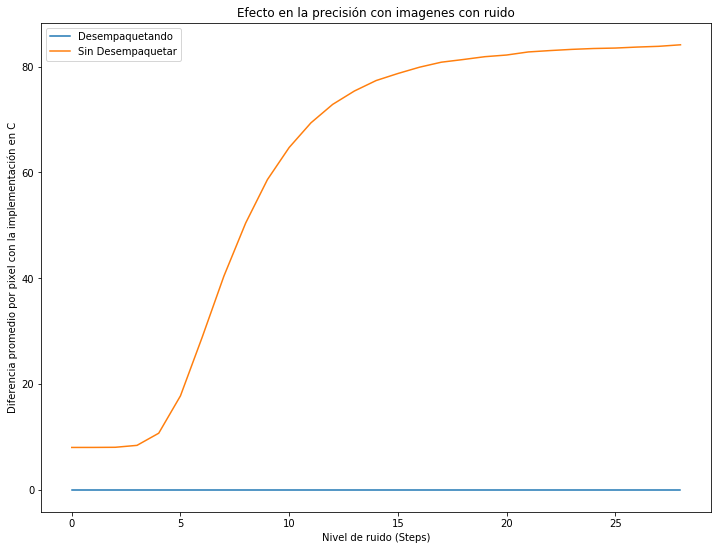

In [8]:
sizes = range(0, MAX_STEP+1)
fig = plt.figure(1, figsize=(12, 9))
plt.plot(sizes, data["normal"], figure=fig, label="Desempaquetando")
plt.plot(sizes, data["sin_desempaquetar"], figure=fig, label="Sin Desempaquetar")
plt.legend()
plt.xlabel("Nivel de ruido (Steps)")
plt.ylabel("Diferencia promedio por pixel con la implementación en C")
plt.title("Efecto en la precisión con imagenes con ruido")
plt.show()

### Obtención de Datos : Rendimiento

In [9]:
IMPS = {
    "referencia":     {"impl": "c",   "bin": "tp2_ref",    "label": "C",
                 "cycles": []},

    "normal":     {"impl": "asm",   "bin": "tp2_ref", "label": "Desempaquetando",
                 "cycles": []},

    "sin_desempaquetar":     {"impl": "asm",   "bin": "tp2_imp", "label": "Sin Desempaquetar",
                 "cycles": []}
}

FILTER = "Bordes"

def run(im, img:str, t:str="1"):
    """Corre una implementacion y retorna el output."""
    # Quiero correr
    #  ./tp2 Rombos -i asm -t 100 img/puente.bmp
    return check_output(["./prec_files/"+im["bin"], FILTER, "-i", im["impl"], "-t", t, img]).decode("utf-8")

def parse_cycles(out):
    """ Output esperado:
0    Procesando...
1      Filtro             : Rombos
2      Implementación     : C
3      Archivo de entrada : img/puente.bmp
4    Tiempo de ejecución:
5      Comienzo                          : 418148872718872
6      Fin                               : 418154435946972
7      # iteraciones                     : 100
8      # de ciclos insumidos totales     : 5563228100
9      # de ciclos insumidos por llamada : 55632280.000
    """
    return float(out.split('\n')[9].split(': ')[1])

In [10]:
IMG = "../src/img/puente.bmp"

for im in IMPS.keys():
    for i in range (0, 100):
        out = run(IMPS[im], IMG)
        IMPS[im]["cycles"].append(parse_cycles(out))
#print(IMPS)

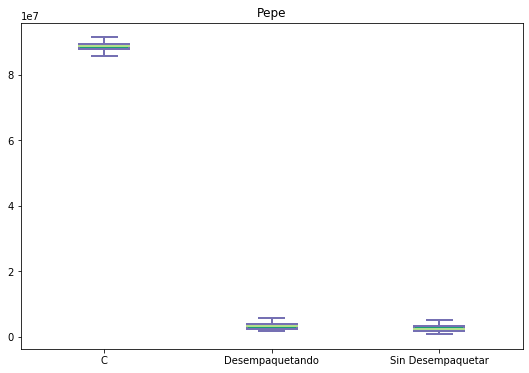

In [11]:
box_plot(IMPS.values(), "Pepe")

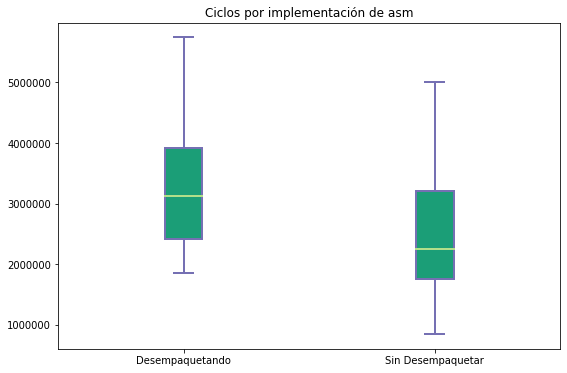

In [12]:
box_plot(
    [info for info in IMPS.values() if info["impl"] == "asm"],
    "Ciclos por implementación de asm"
)

### Borrado de binarios

In [13]:
!rm -r img/
!rm *.bmp
!rm -rf tp2*

rm: cannot remove 'img/': No such file or directory
